In [1]:
##### import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
##### definition
def plot_pie_chart(data, color, title, legend):
    ax.pie(data, colors=color, autopct='%1.1f%%', wedgeprops={"edgecolor":'black','linewidth': 1, 'antialiased': True}, textprops={'fontsize': 15})
    ax.legend(legend, frameon=False, bbox_to_anchor=(1,0.85))
    ax.set_title(title)
    plt.show()
    
def plot_boxplot(data, x_pos, xticklabels, title, rotate):
    meanprops=dict(marker='D', markeredgecolor='red',markerfacecolor='red',markersize=5)
    ax.boxplot(data, 
           showfliers=False,
           showmeans=True, 
           meanprops=meanprops)
    ax.set_ylabel('Time (minutes)')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(xticklabels, rotation=rotate)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()
    
def plot_bar_graph(xrange, data1, data2, xticklabels, title, legend):
    ax.bar(np.arange(xrange), data1, color='steelblue', edgecolor="black", width=0.75)
    ax.bar(np.arange(xrange), data2, bottom=data1, edgecolor="black", color = 'mediumseagreen', width=0.75)
    ax.set_xticks(np.arange(xrange))
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_xlim(-1,xrange)
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.legend(legend, frameon=False, bbox_to_anchor=(1,0.85))
    plt.tight_layout()
    plt.show()

In [3]:
##### open files
data_frame = pd.DataFrame()
directory = 'data'
for filename in os.listdir(directory):
    csv_reader = pd.read_csv(f'data/{filename}')
    csv_reader.drop(['CANCELLED', 'DIVERTED', 'Unnamed: 27', 'CANCELLATION_CODE', 'OP_CARRIER_FL_NUM', 'TAXI_OUT', 'WHEELS_ON', 'WHEELS_OFF', 'TAXI_IN', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME'], axis=1, inplace=True)
    data_frame = data_frame.append(csv_reader, ignore_index=True)

In [88]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60616289 entries, 0 to 61556963
Data columns (total 19 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         float64       
 5   DEP_DELAY            float64       
 6   ARR_DELAY            float64       
 7   AIR_TIME             float64       
 8   DISTANCE             float64       
 9   CARRIER_DELAY        float64       
 10  WEATHER_DELAY        float64       
 11  NAS_DELAY            float64       
 12  SECURITY_DELAY       float64       
 13  LATE_AIRCRAFT_DELAY  float64       
 14  year                 int64         
 15  month                int64         
 16  day                  int64         
 17  origin               object        
 18  destination          object        
dtypes: datetime64[ns](1

In [5]:
#data_frame.isnull().sum(axis = 0)

In [6]:
data_frame['DEP_DELAY'] = data_frame['DEP_DELAY'].apply(lambda x: x if x == x else -10000)
data_frame = data_frame[data_frame['DEP_DELAY'] != -10000]

Delayed Departure: 22303554
On Time: 38312735


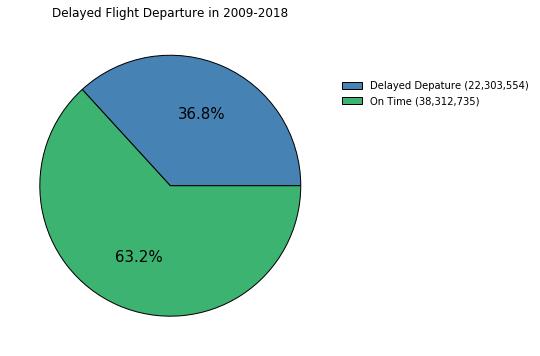

In [61]:
##### overall delayed flights vs non-delayed flights
late_count = data_frame[data_frame['DEP_DELAY'] > 0].shape[0]
not_late_count = data_frame[data_frame['DEP_DELAY'] <= 0].shape[0]
total = data_frame['DEP_DELAY'].shape[0]
print('Delayed Departure:',late_count)
print('On Time:',not_late_count)
legend = ['Delayed Depature (22,303,554)', 'On Time (38,312,735)']

##### plot pie chart
data = [late_count/total*100, not_late_count/total*100]
color = ['steelblue', 'mediumseagreen']
title = 'Delayed Flight Departure in 2009-2018'
fig, ax = plt.subplots(figsize=(12,6))
plot_pie_chart(data, color, title, legend)
#fig.savefig('flightDeparture2009_2018.png')

Delayed departure, arrive Late: 16126176
Delayed departure, arrive on time: 6177378


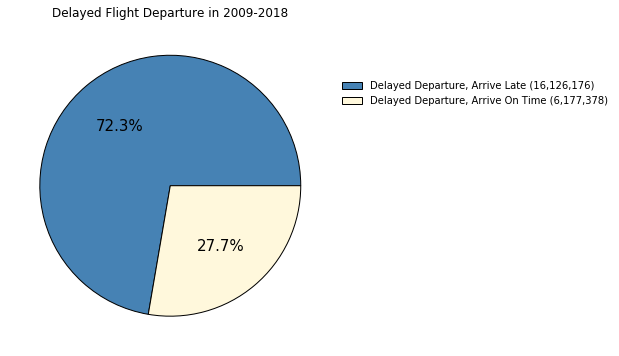

In [65]:
##### overall delayed flights, arriving on time
late = pd.DataFrame()
late['DEP_DELAY'] = data_frame['DEP_DELAY']
late['ARR_DELAY'] = data_frame['ARR_DELAY']
late = late[late['DEP_DELAY'] > 0]
late_count = late.shape[0]
not_late_count = late[late['ARR_DELAY'] <= 0].shape[0]
arrival_late = late_count - not_late_count
print('Delayed departure, arrive Late:', arrival_late)
print('Delayed departure, arrive on time:', not_late_count)
legend = ['Delayed Departure, Arrive Late (16,126,176)', 'Delayed Departure, Arrive On Time (6,177,378)']

##### plot pie chart
data = [arrival_late/late_count*100, not_late_count/late_count*100]
color = ['steelblue', 'cornsilk']
title = 'Delayed Flight Departure in 2009-2018'
fig, ax = plt.subplots(figsize=(12,6))
plot_pie_chart(data, color, title, legend)
#fig.savefig('delayedDeparture2009_2018.png')

In [9]:
data_frame['CARRIER_DELAY'] = data_frame['CARRIER_DELAY'].apply(lambda x: x if x>=0 else -1)
data_frame['NAS_DELAY'] = data_frame['NAS_DELAY'].apply(lambda x: x if x>=0 else -1)
data_frame['WEATHER_DELAY'] = data_frame['WEATHER_DELAY'].apply(lambda x: x if x>=0 else -1)
data_frame['SECURITY_DELAY'] = data_frame['SECURITY_DELAY'].apply(lambda x: x if x>=0 else -1)
data_frame['LATE_AIRCRAFT_DELAY'] = data_frame['LATE_AIRCRAFT_DELAY'].apply(lambda x: x if x>=0 else -1)

In [10]:
##### duplicate dataset
flight_modified = data_frame.copy()

In [11]:
flight_modified = flight_modified[flight_modified['CARRIER_DELAY'] != -1]

In [12]:
##### delay time
delay_time = pd.DataFrame()
delay_time['DEP_DELAY'] = flight_modified['DEP_DELAY']
delay_time = delay_time[delay_time['DEP_DELAY'] > 0]

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


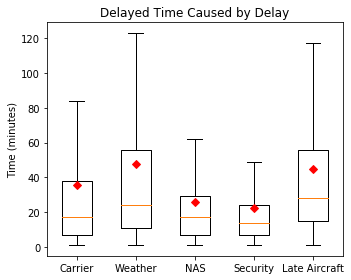

In [89]:
##### delayed time caused by delay
carrier_count = pd.DataFrame()
carrier_count['CARRIER_DELAY'] = flight_modified['CARRIER_DELAY']
carrier_count = carrier_count[carrier_count['CARRIER_DELAY'] > 0]
weather_count = pd.DataFrame()
weather_count['WEATHER_DELAY'] = flight_modified['WEATHER_DELAY']
weather_count = weather_count[weather_count['WEATHER_DELAY'] > 0]
NAS_count = pd.DataFrame()
NAS_count['NAS_DELAY'] = flight_modified['NAS_DELAY']
NAS_count = NAS_count[NAS_count['NAS_DELAY'] > 0]
security_count = pd.DataFrame()
security_count['SECURITY_DELAY'] = flight_modified['SECURITY_DELAY']
security_count = security_count[security_count['SECURITY_DELAY'] > 0]
late_aircraft_count = pd.DataFrame()
late_aircraft_count['LATE_AIRCRAFT_DELAY'] = flight_modified['LATE_AIRCRAFT_DELAY']
late_aircraft_count = late_aircraft_count[late_aircraft_count['LATE_AIRCRAFT_DELAY'] > 0]

##### boxplot
data = [carrier_count['CARRIER_DELAY'], weather_count['WEATHER_DELAY'], NAS_count['NAS_DELAY'], security_count['SECURITY_DELAY'], late_aircraft_count['LATE_AIRCRAFT_DELAY']]
xticklabels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
x_pos = np.arange(len(xticklabels))
title = 'Delayed Time Caused by Delay'
fig, ax = plt.subplots(figsize=(5,4))
plot_boxplot(data, x_pos, xticklabels, title, 0)
#fig.savefig('boxplotDelay.png')

In [14]:
##### extract month, day, and year
data_frame['FL_DATE'] = pd.to_datetime(data_frame['FL_DATE'])
data_frame['year'] = data_frame['FL_DATE'].dt.year
data_frame['month'] = data_frame['FL_DATE'].dt.month
data_frame['day'] = data_frame['FL_DATE'].dt.day

In [15]:
##### replace airline code with airline name
data_frame['OP_CARRIER'].replace({
    'NK':'Spirit Airlines',
    'MQ':'Envoy Air',
    'OO':'SkyWest Airlines',
    'EV':'ExpressJet Airlines',
    'HA':'Hawaiian Airlines',
    'UA':'United Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'B6':'JetBlue Airways',
    'F9':'Frontier Airlines',
    'AA':'American Airlines',
    'AS':'Alaska Airlines',
    'DL':'Delta Air Lines',
    '9E':'Endeavor Air',
    'G4':'Allegiant Air',
    'OH':'PSA Airlines',
    'YV':'Mesa Airlines',
    'YX':'Republic Airways',
    'US':'US Airways',
    'FL':'AirTran Airways',
    'XE':'ExpressJet Airlines',
    'CO':'Continental Airlines',
    'NW':'Northwest Airlines'
},inplace=True)

In [16]:
data_frame['origin'] = data_frame['ORIGIN']
data_frame['destination'] = data_frame['DEST']

In [17]:
##### duplicate data
flight3 = data_frame.copy()

In [18]:
Alabama = ['BHM', 'DHN', 'HSV', 'MOB', 'MGM']
Alaska = ['ANC', 'FAI', 'JNU', 'YAK', 'CDV', 'WRG', 'PSG', 'SIT', 'KTN', 'OME', 'OTZ', 'BRW', 'SCC', 'BET', 'ADQ', 'ADK', 'AKN', 'GST', 'DLG']
Arizona = ['FLG', 'PHX', 'TUS', 'YUM', 'IFP', 'AZA', 'PRC']
Arkansas = ['FYV', 'LIT', 'XNA', 'FSM', 'TXK']
California = ['BUR', 'FAT', 'LGB', 'LAX', 'OAK', 'ONT', 'PSP', 'SMF', 'SAN', 'SFO', 'SJC', 'SNA', 'BFL', 'SBA', 'ACV', 'SBP', 'RDD', 'CLD', 'MMH', 'SMX', 'MRY', 'CEC', 'STS', 'SCK', 'MOD', 'IYK', 'IPL', 'CIC', 'OXR']
Colorado = ['ASE', 'COS', 'DEN', 'GJT', 'PUB', 'DRO', 'HDN', 'EGE', 'MTJ', 'GUC', 'TEX', 'FNL']
Connecticut = ['BDL', 'HVN']
DistrictofColumbia =['IAD', 'DCA']
Delaware = ['ILG']
Florida = ['DAB', 'FLL', 'RSW', 'JAX', 'EYW', 'MIA', 'MCO', 'PNS', 'PIE', 'SRQ', 'TPA', 'PBI', 'PFN', 'VPS', 'ECP', 'TLH', 'GNV', 'UST', 'MLB', 'PGD', 'SFB']
Georgia =['ATL', 'AGS', 'SAV', 'CSG', 'ABY', 'VLD', 'BQK', 'MCN']
Hawaii = ['ITO', 'HNL', 'OGG', 'KOA', 'LIA', 'LIH']
Idaho = ['BOI', 'SUN', 'IDA', 'LWS', 'PIH', 'TWF']
Illinois = ['MDW', 'ORD', 'MLI', 'PIA', 'BMI', 'CMI', 'SPI', 'UIN', 'RFD', 'BLV']
Indiana = ['EVV', 'FWA', 'IND', 'SBN']
Iowa =['CID', 'DSM', 'SUX', 'ALO', 'DBQ']
Kansas = ['ICT', 'GCK', 'MHK', 'HYS', 'LBL', 'SLN', 'FOE']
Kentucky = ['LEX', 'SDF', 'PAH', 'OWB']
Louisiana = ['BTR', 'MSY', 'SHV', 'LFT', 'MLU', 'AEX', 'LCH']
Maine = ['AUG', 'BGR', 'PWM']
Maryland =['BWI', 'HGR']
Massachusetts = ['BOS', 'HYA', 'ACK', 'ORH', 'MVY']
Michigan = ['BTL', 'DTW', 'DET', 'FNT', 'GRR', 'AZO', 'LAN', 'MBS', 'CMX', 'APN', 'MQT', 'TVC', 'MKG' 'IMT', 'MKG', 'IMT', 'CIU', 'ESC', 'PLN']
Minnesota = ['DLH', 'MSP', 'RST', 'BJI', 'INL', 'HIB']
Mississippi = ['GPT', 'JAN', 'BRD', 'STC', 'PIB', 'MEI', 'GTR', 'UTM', 'TUP']
Missouri = ['MCI', 'STL', 'SGF', 'JLN', 'COU', 'CGI', 'BKG']
Montana = ['BIL', 'BZN', 'MSO', 'FCA', 'HLN', 'GTF', 'BTM', 'WYS']
Nebraska = ['LNK', 'OMA', 'GRI', 'BFF', 'LBF', 'EAR']
Nevada = ['LAS', 'RNO', 'EKO']
NewHampshire = ['MHT', 'PSM']
NewJersey = ['ACY', 'EWR', 'TTN']
NewMexico = ['ABQ', 'ALM', 'SAF', 'ROW', 'HOB']
NewYork = ['ALB', 'BUF', 'ISP', 'JFK', 'LGA', 'SWF', 'ROC', 'SYR', 'HPN', 'PBG', 'ELM', 'IAG', 'BGM', 'ITH', 'OGS', 'ART']
NorthCarolina = ['AVL', 'CLT', 'FAY', 'GSO', 'RDU', 'INT', 'ILM', 'EWN', 'OAJ', 'USA', 'PGV']
NorthDakota = ['BIS', 'FAR', 'DVL', 'JMS', 'MOT', 'ISN', 'DIK', 'GFK']
Ohio = ['CAK', 'CVG', 'CLE', 'CMH', 'DAY', 'TOL', 'LCK', 'YNG']
Oklahoma = ['OKC', 'TUL', 'LAW', 'SWO']
Oregon = ['EUG', 'PDX', 'HIO', 'SLE', 'MFR', 'RDM', 'OTH', 'LMT']
Pennsylvania = ['ABE', 'ERI', 'MDT', 'PHL', 'PIT', 'AVP', 'SCE', 'LBE']
RhodeIsland = ['PVD']
SouthCarolina = ['SHC', 'CAE', 'GSP', 'MYR', 'CHS', 'FLO', 'HHH']
SouthDakota = ['RAP', 'FSD', 'ABR', 'PIR']
Tennessee = ['TRI', 'CHA', 'TYS', 'MEM', 'BNA']
Texas = ['AMA', 'AUS', 'CRP', 'DAL', 'DFW', 'ELP', 'HOU', 'IAH', 'LBB', 'MAF', 'SAT', 'HRL', 'GGG', 'BRO', 'GRK', 'BPT', 'LRD', 'CLL', 'ACT', 'SPS', 'MFE', 'TYR', 'ABI', 'SJT', 'EFD', 'DRT', 'TKI']
Utah = ['SLC', 'SGU', 'VEL', 'CDC', 'CNY', 'PVU', 'OGD', 'ENV']
Vermont = ['BTV', 'MPV', 'RUT', 'CHO']
Virginia = ['IAD', 'PHF', 'ORF', 'RIC', 'ROA', 'LYH', 'SHD']
Washington = ['PSC', 'SEA', 'GEG', 'BLI', 'MWH']
WestVirginia = ['CRW', 'CKB', 'HTS', 'CRW', 'LWB']
Wisconsin = ['GRB', 'MSN', 'MKE', 'RHI', 'CWA', 'ATW', 'EAU', 'LSE']
Wyoming = ['CPR', 'CYS', 'JAC', 'RKS', 'GCC', 'COD', 'LAR']
Guam = ['GUM']
VirginIslands = ['STT', 'STX']
PueroRico = ['SJU', 'BQN', 'PSE']
Samoa = ['PPG']
NorthernMarianaIslands = ['SPN']

flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Alabama' if (x in Alabama) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Alaska' if (x in Alaska) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Arizona' if (x in Arizona) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Arkansas' if (x in Arkansas) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'California' if (x in California) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Colorado' if (x in Colorado) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Connecticut' if (x in Connecticut) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'District_of_Columbia' if (x in DistrictofColumbia) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Delaware' if (x in Delaware) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Florida' if (x in Florida) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Georgia' if (x in Georgia) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Hawaii' if (x in Hawaii) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Idaho' if (x in Idaho) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Illinois' if (x in Illinois) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Indiana' if (x in Indiana) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Iowa' if (x in Iowa) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Kansas' if (x in Kansas) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Kentucky' if (x in Kentucky) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Louisiana' if (x in Louisiana) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Maine' if (x in Maine) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Maryland' if (x in Maryland) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Massachusetts' if (x in Massachusetts) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Michigan' if (x in Michigan) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Minnesota' if (x in Minnesota) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Mississippi' if (x in Mississippi) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Missouri' if (x in Missouri) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Montana' if (x in Montana) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Nebraska' if (x in Nebraska) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Nevada' if (x in Nevada) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'New_Hampshire' if (x in NewHampshire) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'New_Jersey' if (x in NewJersey) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'New_Mexico' if (x in NewMexico) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'New_York' if (x in NewYork) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'North_Carolina' if (x in NorthCarolina) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'North_Dakota' if (x in NorthDakota) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Ohio' if (x in Ohio) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Oklahoma' if (x in Oklahoma) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Oregon' if (x in Oregon) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Pennsylvania' if (x in Pennsylvania) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Rhode_Island' if (x in RhodeIsland) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'South_Carolina' if (x in SouthCarolina) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'South_Dakota' if (x in SouthDakota) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Tennessee' if (x in Tennessee) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Texas' if (x in Texas) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Utah' if (x in Utah) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Vermont' if (x in Vermont) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Virginia' if (x in Virginia) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Washington' if (x in Washington) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'West_Virginia' if (x in WestVirginia) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Wisconsin' if (x in Wisconsin) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Wyoming' if (x in Wyoming) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Guam' if (x in Guam) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'US_Virgin_Islands' if (x in VirginIslands) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Puero_Rico' if (x in PueroRico) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'American_Samoa' if (x in Samoa) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Northern_Mariana_Islands' if (x in NorthernMarianaIslands) else x)

flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Alabama' if (x in Alabama) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Alaska' if (x in Alaska) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Arizona' if (x in Arizona) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Arkansas' if (x in Arkansas) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'California' if (x in California) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Colorado' if (x in Colorado) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Connecticut' if (x in Connecticut) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'District_of_Columbia' if (x in DistrictofColumbia) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Delaware' if (x in Delaware) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Florida' if (x in Florida) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Georgia' if (x in Georgia) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Hawaii' if (x in Hawaii) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Idaho' if (x in Idaho) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Illinois' if (x in Illinois) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Indiana' if (x in Indiana) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Iowa' if (x in Iowa) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Kansas' if (x in Kansas) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Kentucky' if (x in Kentucky) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Louisiana' if (x in Louisiana) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Maine' if (x in Maine) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Maryland' if (x in Maryland) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Massachusetts' if (x in Massachusetts) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Michigan' if (x in Michigan) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Minnesota' if (x in Minnesota) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Mississippi' if (x in Mississippi) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Missouri' if (x in Missouri) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Montana' if (x in Montana) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Nebraska' if (x in Nebraska) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Nevada' if (x in Nevada) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'New_Hampshire' if (x in NewHampshire) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'New_Jersey' if (x in NewJersey) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'New_Mexico' if (x in NewMexico) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'New_York' if (x in NewYork) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'North_Carolina' if (x in NorthCarolina) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'North_Dakota' if (x in NorthDakota) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Ohio' if (x in Ohio) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Oklahoma' if (x in Oklahoma) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Oregon' if (x in Oregon) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Pennsylvania' if (x in Pennsylvania) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Rhode_Island' if (x in RhodeIsland) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'South_Carolina' if (x in SouthCarolina) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'South_Dakota' if (x in SouthDakota) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Tennessee' if (x in Tennessee) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Texas' if (x in Texas) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Utah' if (x in Utah) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Vermont' if (x in Vermont) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Virginia' if (x in Virginia) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Washington' if (x in Washington) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'West_Virginia' if (x in WestVirginia) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Wisconsin' if (x in Wisconsin) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Wyoming' if (x in Wyoming) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Guam' if (x in Guam) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'US_Virgin_Islands' if (x in VirginIslands) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Puero_Rico' if (x in PueroRico) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'American_Samoa' if (x in Samoa) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Northern_Mariana_Islands' if (x in NorthernMarianaIslands) else x)

In [19]:
flight3['planned departure'] = flight3['CRS_DEP_TIME']

In [20]:
##### 0 = morning, 1 = afternoon, 2 = evening, 3 = night
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 3 if (x < 600) else x)
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 0 if (x >=600 and x < 1200) else x)
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 1 if (x >=1200 and x < 1700) else x)
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 2 if (x >=1700 and x < 2000) else x)
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 3 if (x >=2000) else x)

In [21]:
##### 0 = morning, 1 = afternoon, 2 = evening, 3 = night
flight3['CRS_DEP_TIME'].replace({
    0:'morning',
    1:'afternoon',
    2:'evening',
    3:'night',
},inplace=True)

In [22]:
##### delay time
delay_time = flight3[flight3['DEP_DELAY'] > 0]

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


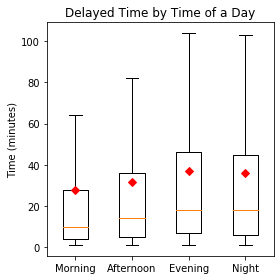

In [90]:
##### delayed time in the morning, afteroon, evening, and at night
morning_count = delay_time[delay_time['CRS_DEP_TIME'] == 'morning']
afternoon_count = delay_time[delay_time['CRS_DEP_TIME'] == 'afternoon']
evening_count = delay_time[delay_time['CRS_DEP_TIME'] == 'evening']
night_count = delay_time[delay_time['CRS_DEP_TIME'] == 'night']

##### boxplot
data = [morning_count['DEP_DELAY'], afternoon_count['DEP_DELAY'], evening_count['DEP_DELAY'], night_count['DEP_DELAY']]
xticklabels = ['Morning', 'Afternoon', 'Evening', 'Night']
x_pos = np.arange(len(xticklabels))
title = 'Delayed Time by Time of a Day'
fig, ax = plt.subplots(figsize=(4,4))
plot_boxplot(data, x_pos, xticklabels, title, 0)
#fig.savefig('boxplotTime.png')

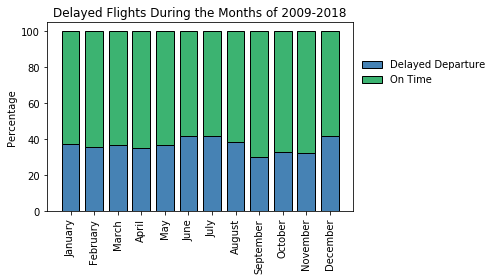

In [91]:
##### delayed flights during the Months of 2009-2018
month_count = delay_time.groupby('month')['DEP_DELAY'].count()
not_delayed = flight3.groupby('month')['DEP_DELAY'].count() - month_count
total = flight3.groupby('month')['DEP_DELAY'].count()

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
legend = ['Delayed Departure', 'On Time']

##### plot graph
xrange = month_count.shape[0]
data1 = month_count/total*100
data2 = not_delayed/total*100
xticklabels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
title = 'Delayed Flights During the Months of 2009-2018'
fig, ax = plt.subplots(figsize=(7,4))
plot_bar_graph(xrange, data1, data2, xticklabels, title, legend)
#fig.savefig('months.png')

In [92]:
##### delayed time during the months of 2009-2018
jan = delay_time[delay_time['month'] == 1]
feb = delay_time[delay_time['month'] == 2]
mar = delay_time[delay_time['month'] == 3]
apr = delay_time[delay_time['month'] == 4]
may = delay_time[delay_time['month'] == 5]
jun = delay_time[delay_time['month'] == 6]
jul = delay_time[delay_time['month'] == 7]
aug = delay_time[delay_time['month'] == 8]
sep = delay_time[delay_time['month'] == 9]
oct = delay_time[delay_time['month'] == 10]
nov = delay_time[delay_time['month'] == 11]
dec = delay_time[delay_time['month'] == 12]

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


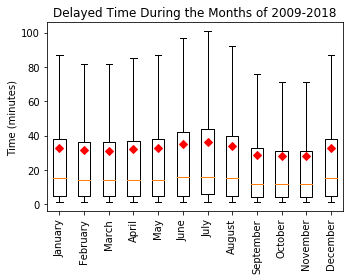

In [93]:
##### delayed time during the months of 2009-2018
data = [jan['DEP_DELAY'], feb['DEP_DELAY'], mar['DEP_DELAY'], apr['DEP_DELAY'], may['DEP_DELAY'], jun['DEP_DELAY'], jul['DEP_DELAY'], aug['DEP_DELAY'], sep['DEP_DELAY'], oct['DEP_DELAY'], nov['DEP_DELAY'], dec['DEP_DELAY']]
xticklabels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x_pos = np.arange(len(xticklabels))
title = 'Delayed Time During the Months of 2009-2018'
fig, ax = plt.subplots(figsize=(5,4))
plot_boxplot(data, x_pos, xticklabels, title, 90)
#fig.savefig('boxplotMonths.png')

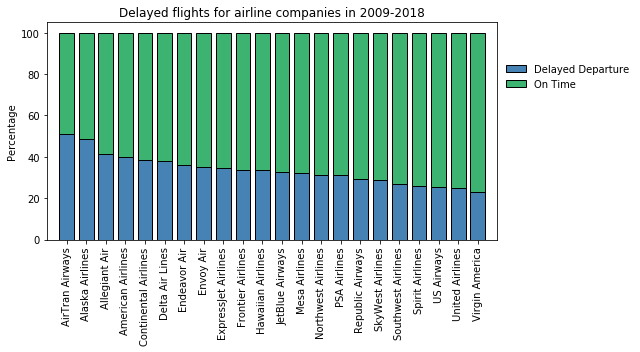

In [94]:
##### delayed flights for airline companies in 2009-2018
airline_count = delay_time.groupby('OP_CARRIER')['DEP_DELAY'].count()
not_delayed = flight3.groupby('OP_CARRIER')['DEP_DELAY'].count() - airline_count
total = flight3.groupby('OP_CARRIER')['DEP_DELAY'].count()

sort = (airline_count/total).sort_values(ascending=False)
sort_airlines = sort.index.tolist()

airlines = airline_count.index.tolist()
legend = ['Delayed Departure', 'On Time']

##### plot graph
xrange = airline_count.shape[0]
data1 = -np.sort(-airline_count/total*100)
data2 = np.sort(not_delayed/total*100)
xticklabels = airline_count.index.tolist()
title = 'Delayed flights for airline companies in 2009-2018'
fig, ax = plt.subplots(figsize=(9,5))
plot_bar_graph(xrange, data1, data2, xticklabels, title, legend)
#fig.savefig('airline.png')

In [31]:
##### delayed time for airline companies in 2009-2018
fl = delay_time[delay_time['OP_CARRIER'] == 'AirTran Airways']
aas = delay_time[delay_time['OP_CARRIER'] == 'Alaska Airlines']
g4 = delay_time[delay_time['OP_CARRIER'] == 'Allegiant Air']
aa = delay_time[delay_time['OP_CARRIER'] == 'American Airlines']
co = delay_time[delay_time['OP_CARRIER'] == 'Continental Airlines']
dl = delay_time[delay_time['OP_CARRIER'] == 'Delta Air Lines']
e = delay_time[delay_time['OP_CARRIER'] == 'Endeavor Air']
mq = delay_time[delay_time['OP_CARRIER'] == 'Envoy Air']
ev = delay_time[delay_time['OP_CARRIER'] == 'ExpressJet Airlines']
f9 = delay_time[delay_time['OP_CARRIER'] == 'Frontier Airlines']

ha = delay_time[delay_time['OP_CARRIER'] == 'Hawaiian Airlines']
b6 = delay_time[delay_time['OP_CARRIER'] == 'JetBlue Airways']
yv = delay_time[delay_time['OP_CARRIER'] == 'Mesa Airlines']
nw = delay_time[delay_time['OP_CARRIER'] == 'Northwest Airlines']
oh = delay_time[delay_time['OP_CARRIER'] == 'PSA Airlines']
yx = delay_time[delay_time['OP_CARRIER'] == 'Republic Airways']
oo = delay_time[delay_time['OP_CARRIER'] == 'SkyWest Airlines']
wn = delay_time[delay_time['OP_CARRIER'] == 'Southwest Airlines']
nk = delay_time[delay_time['OP_CARRIER'] == 'Spirit Airlines']
us = delay_time[delay_time['OP_CARRIER'] == 'US Airways']

ua = delay_time[delay_time['OP_CARRIER'] == 'United Airlines']
vx = delay_time[delay_time['OP_CARRIER'] == 'Virgin America']

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


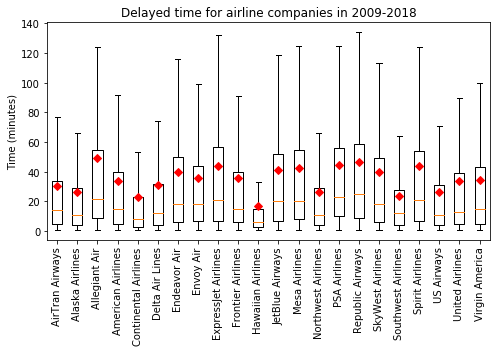

In [95]:
##### delayed time for airline companies in 2009-2018
airline_count = delay_time.groupby('OP_CARRIER')['DEP_DELAY'].count()
data = [fl['DEP_DELAY'],
        aas['DEP_DELAY'], 
        g4['DEP_DELAY'], 
        aa['DEP_DELAY'],
        co['DEP_DELAY'],
        dl['DEP_DELAY'], 
        e['DEP_DELAY'], 
        mq['DEP_DELAY'], 
        ev['DEP_DELAY'], 
        f9['DEP_DELAY'], 
        ha['DEP_DELAY'], 
        b6['DEP_DELAY'], 
        yv['DEP_DELAY'],
        nw['DEP_DELAY'],
        oh['DEP_DELAY'],
        yx['DEP_DELAY'],
        oo['DEP_DELAY'], 
        wn['DEP_DELAY'], 
        nk['DEP_DELAY'], 
        us['DEP_DELAY'],
        ua['DEP_DELAY'],
        vx['DEP_DELAY']]
xticklabels = airline_count.index.tolist()
x_pos = np.arange(len(xticklabels))
title = 'Delayed time for airline companies in 2009-2018'
fig, ax = plt.subplots(figsize=(7,5))
plot_boxplot(data, x_pos, xticklabels, title, 90)
#fig.savefig('boxplotAirline.png')

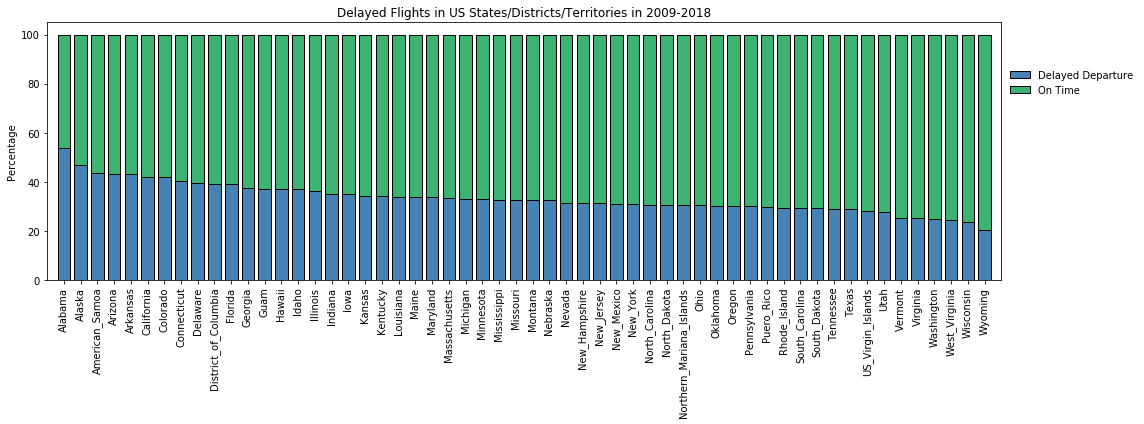

In [96]:
##### delays for states/districts/territories in 2009-2018
state_count = delay_time.groupby('ORIGIN')['DEP_DELAY'].count()
not_delayed = flight3.groupby('ORIGIN')['DEP_DELAY'].count() - state_count
total = flight3.groupby('ORIGIN')['DEP_DELAY'].count()

sort = (state_count/total).sort_values(ascending=False)
sort_state = sort.index.tolist()

state = state_count.index.tolist()
legend = ['Delayed Departure', 'On Time']

##### plot graph
xrange = state_count.shape[0]
data1 = -np.sort(-state_count/total*100)
data2 = np.sort(not_delayed/total*100)
xticklabels = state_count.index.tolist()
title = 'Delayed Flights in US States/Districts/Territories in 2009-2018'
fig, ax = plt.subplots(figsize=(16,6))
plot_bar_graph(xrange, data1, data2, xticklabels, title, legend)
#fig.savefig('states.png')

In [34]:
##### delay time for states/districts/territories in 2009-2018
Florida = delay_time[delay_time['ORIGIN'] == 'Florida']
Minnesota = delay_time[delay_time['ORIGIN'] == 'Minnesota']
Tennessee = delay_time[delay_time['ORIGIN'] == 'Tennessee']
Illinois = delay_time[delay_time['ORIGIN'] == 'Illinois']
California = delay_time[delay_time['ORIGIN'] == 'California']
Michigan = delay_time[delay_time['ORIGIN'] == 'Michigan']
Texas = delay_time[delay_time['ORIGIN'] == 'Texas']
Missouri = delay_time[delay_time['ORIGIN'] == 'Missouri']
Colorado = delay_time[delay_time['ORIGIN'] == 'Colorado']
Maryland = delay_time[delay_time['ORIGIN'] == 'Maryland']

Arizona = delay_time[delay_time['ORIGIN'] == 'Arizona']
New_York = delay_time[delay_time['ORIGIN'] == 'New_York']
New_Jersey = delay_time[delay_time['ORIGIN'] == 'New_Jersey']
Louisiana = delay_time[delay_time['ORIGIN'] == 'Louisiana']
South_Carolina = delay_time[delay_time['ORIGIN'] == 'South_Carolina']
Nevada = delay_time[delay_time['ORIGIN'] == 'Nevada']
Utah = delay_time[delay_time['ORIGIN'] == 'Utah']
Idaho = delay_time[delay_time['ORIGIN'] == 'Idaho']
Alabama = delay_time[delay_time['ORIGIN'] == 'Alabama']
Kansas = delay_time[delay_time['ORIGIN'] == 'Kansas']

Georgia = delay_time[delay_time['ORIGIN'] == 'Georgia']
Nebraska = delay_time[delay_time['ORIGIN'] == 'Nebraska']
Montana = delay_time[delay_time['ORIGIN'] == 'Montana']
Wyoming = delay_time[delay_time['ORIGIN'] == 'Wyoming']
Arkansas = delay_time[delay_time['ORIGIN'] == 'Arkansas']
Wisconsin = delay_time[delay_time['ORIGIN'] == 'Wisconsin']
Oregon = delay_time[delay_time['ORIGIN'] == 'Oregon']
Washington = delay_time[delay_time['ORIGIN'] == 'Washington']
North_Dakota = delay_time[delay_time['ORIGIN'] == 'North_Dakota']
New_Mexico = delay_time[delay_time['ORIGIN'] == 'New_Mexico']

Ohio = delay_time[delay_time['ORIGIN'] == 'Ohio']
Hawaii = delay_time[delay_time['ORIGIN'] == 'Hawaii']
Oklahoma = delay_time[delay_time['ORIGIN'] == 'Oklahoma']
South_Dakota = delay_time[delay_time['ORIGIN'] == 'South_Dakota']
North_Carolina = delay_time[delay_time['ORIGIN'] == 'North_Carolina']
Mississippi = delay_time[delay_time['ORIGIN'] == 'Mississippi']
District_of_Columbia = delay_time[delay_time['ORIGIN'] == 'District_of_Columbia']
Guam = delay_time[delay_time['ORIGIN'] == 'Guam']
Iowa = delay_time[delay_time['ORIGIN'] == 'Iowa']
Massachusetts = delay_time[delay_time['ORIGIN'] == 'Massachusetts']

Pennsylvania = delay_time[delay_time['ORIGIN'] == 'Pennsylvania']
US_Virgin_Islands = delay_time[delay_time['ORIGIN'] == 'US_Virgin_Islands']
Connecticut = delay_time[delay_time['ORIGIN'] == 'Connecticut']
Indiana = delay_time[delay_time['ORIGIN'] == 'Indiana']
New_Hampshire = delay_time[delay_time['ORIGIN'] == 'New_Hampshire']
Rhode_Island = delay_time[delay_time['ORIGIN'] == 'Rhode_Island']
Puero_Rico = delay_time[delay_time['ORIGIN'] == 'Puero_Rico']
Virginia = delay_time[delay_time['ORIGIN'] == 'Virginia']
Alaska = delay_time[delay_time['ORIGIN'] == 'Alaska']
Kentucky = delay_time[delay_time['ORIGIN'] == 'Kentucky']

West_Virginia = delay_time[delay_time['ORIGIN'] == 'West_Virginia']
Delaware = delay_time[delay_time['ORIGIN'] == 'Delaware']
Vermont = delay_time[delay_time['ORIGIN'] == 'Vermont']
Maine = delay_time[delay_time['ORIGIN'] == 'Maine']
American_Samoa = delay_time[delay_time['ORIGIN'] == 'American_Samoa']
Northern_Mariana_Islands = delay_time[delay_time['ORIGIN'] == 'Northern_Mariana_Islands']

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


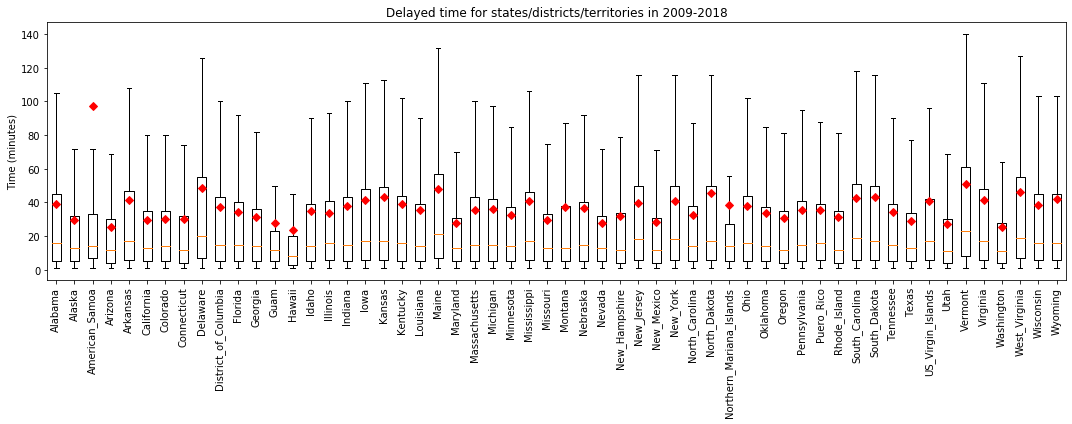

In [97]:
##### Delayed time for states/districts/territories in 2009-2018
state_count = delay_time.groupby('ORIGIN')['DEP_DELAY'].count()
data = [Alabama['DEP_DELAY'], 
        Alaska['DEP_DELAY'], 
        American_Samoa['DEP_DELAY'], 
        Arizona['DEP_DELAY'], 
        Arkansas['DEP_DELAY'], 
        California['DEP_DELAY'], 
        Colorado['DEP_DELAY'], 
        Connecticut['DEP_DELAY'], 
        Delaware['DEP_DELAY'], 
        District_of_Columbia['DEP_DELAY'], 
        Florida['DEP_DELAY'],
        Georgia['DEP_DELAY'],
        Guam['DEP_DELAY'],
        Hawaii['DEP_DELAY'], 
        Idaho['DEP_DELAY'], 
        Illinois['DEP_DELAY'], 
        Indiana['DEP_DELAY'], 
        Iowa['DEP_DELAY'], 
        Kansas['DEP_DELAY'],
        Kentucky['DEP_DELAY'],           
        Louisiana['DEP_DELAY'],
        Maine['DEP_DELAY'],
        Maryland['DEP_DELAY'],
        Massachusetts['DEP_DELAY'], 
        Michigan['DEP_DELAY'], 
        Minnesota['DEP_DELAY'], 
        Mississippi['DEP_DELAY'], 
        Missouri['DEP_DELAY'], 
        Montana['DEP_DELAY'], 
        Nebraska['DEP_DELAY'],
        Nevada['DEP_DELAY'],
        New_Hampshire['DEP_DELAY'],
        New_Jersey['DEP_DELAY'],
        New_Mexico['DEP_DELAY'], 
        New_York['DEP_DELAY'], 
        North_Carolina['DEP_DELAY'], 
        North_Dakota['DEP_DELAY'], 
        Northern_Mariana_Islands['DEP_DELAY'], 
        Ohio['DEP_DELAY'], 
        Oklahoma['DEP_DELAY'],        
        Oregon['DEP_DELAY'],
        Pennsylvania['DEP_DELAY'],
        Puero_Rico['DEP_DELAY'],
        Rhode_Island['DEP_DELAY'], 
        South_Carolina['DEP_DELAY'], 
        South_Dakota['DEP_DELAY'], 
        Tennessee['DEP_DELAY'], 
        Texas['DEP_DELAY'], 
        US_Virgin_Islands['DEP_DELAY'], 
        Utah['DEP_DELAY'],
        Vermont['DEP_DELAY'],
        Virginia['DEP_DELAY'],
        Washington['DEP_DELAY'],
        West_Virginia['DEP_DELAY'], 
        Wisconsin['DEP_DELAY'], 
        Wyoming['DEP_DELAY']]
xticklabels = state_count.index.tolist()
x_pos = np.arange(len(xticklabels))
title = 'Delayed time for states/districts/territories in 2009-2018'
fig, ax = plt.subplots(figsize=(15,6))
plot_boxplot(data, x_pos, xticklabels, title, 90)
#fig.savefig('boxplotStates.png')